# HW4 
We use the cleaned data from the previous homework. 

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
# Import data
cell_phones = pd.read_csv("cell_phone_cleaned.csv")
pop = pd.read_csv("pop_data.csv")

# Melt data into long format
df_Long_cp = cell_phones.melt(id_vars='iso-3', var_name='year', value_name='n_cellphones')
df_Long_P = pop.melt(id_vars='iso-3', var_name='year', value_name='population')

# Merge the datasets on 'iso-3' and 'year'
merged_data = pd.merge(df_Long_cp, df_Long_P, on=['iso-3', 'year'], how="inner")

# Display a sample of the merged data
print(merged_data.head())

  iso-3  year  n_cellphones  population
0   ABW  1960           0.0     54608.0
1   AFG  1960           0.0   8622466.0
2   AGO  1960           0.0   5357195.0
3   ALB  1960           0.0   1608800.0
4   AND  1960           0.0      9443.0


Here we've merged the two datasets using .melt so that the first two columns are iso-3 code and year... We merge using how="inner" so that we can drop missing rows instead of getting NaN values for missing rows. 

Next we want to find the number of cell phones per capita, or the number of phones per person. 

In [235]:
# Load country_data 
country = pd.read_csv("country_data.csv")

# Only use alpha-3 and name column
country_2 = country[['alpha-3', 'name']]

country_2.head()

,alpha-3,name
0,AFG,Afghanistan
1,ALA,Åland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


Next we want to merge country with the merged_data 

In [236]:
# Merge the alpha-3 code with iso-3 
mega_merged_data = merged_data.merge(country_2, left_on='iso-3', 
                                     right_on='alpha-3',
                                    how='right')

mega_merged_data.head()

,iso-3,year,n_cellphones,population,alpha-3,name
0,AFG,1960,0.0,8622466.0,AFG,Afghanistan
1,AFG,1965,0.0,9565147.0,AFG,Afghanistan
2,AFG,1966,0.0,9783147.0,AFG,Afghanistan
3,AFG,1967,0.0,10010030.0,AFG,Afghanistan
4,AFG,1968,0.0,10247780.0,AFG,Afghanistan


In [237]:
# Drop 'alpha-3' column and iso-3 columns and keep "name" only
mega_merged_data = mega_merged_data.drop(columns = 'alpha-3')
mega_merged_data = mega_merged_data.drop(columns = 'iso-3')

mega_merged_data.head()

,year,n_cellphones,population,name
0,1960,0.0,8622466.0,Afghanistan
1,1965,0.0,9565147.0,Afghanistan
2,1966,0.0,9783147.0,Afghanistan
3,1967,0.0,10010030.0,Afghanistan
4,1968,0.0,10247780.0,Afghanistan


In [238]:
# Calculate cell phones per capita
mmd = mega_merged_data 
mmd['cellphones_per_capita'] = mmd['n_cellphones'] / mmd['population']

print(mmd.head())

   year  n_cellphones  population         name  cellphones_per_capita
0  1960           0.0   8622466.0  Afghanistan                    0.0
1  1965           0.0   9565147.0  Afghanistan                    0.0
2  1966           0.0   9783147.0  Afghanistan                    0.0
3  1967           0.0  10010030.0  Afghanistan                    0.0
4  1968           0.0  10247780.0  Afghanistan                    0.0


In [239]:
# Pivot data 
pivot_mmd = mmd.pivot(index='year', columns = 'name', values = 'cellphones_per_capita')

pivot_mmd = pivot_mmd.dropna(axis=1, how='all')
pivot_mmd = pivot_mmd.dropna(how='all')

pivot_mmd.head()

name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
# Sort by 2019
mmd_max_19 = pivot_mmd.sort_values(by='2019', axis=1, ascending=False)

# let's display a 10 year period. 
mmd_max_19.iloc[-5:, 5:]

name,Montenegro,Thailand,South Africa,Lithuania,Russian Federation,Sint Maarten (Dutch part),Kuwait,Maldives,Saint Kitts and Nevis,Costa Rica,...,Niger,Djibouti,Marshall Islands,South Sudan,Ethiopia,Central African Republic,Micronesia (Federated States of),Eritrea,Korea (Democratic People's Republic of),American Samoa
year,,,,,,,,,,,,,,,,,,,,,
2015,1.623379,1.465266,1.574902,1.438943,1.575329,1.772054,1.959709,1.698876,1.527516,1.540271,...,0.445148,0.312047,0.313702,0.259060,0.412796,0.257297,0.205551,0.142215,0.128276,0.043802
2016,1.671212,1.699547,1.460416,1.464317,1.586505,1.721334,1.892253,1.787554,1.602913,1.684460,...,0.357045,0.337157,0.320718,0.243988,0.486261,0.254885,0.212872,0.150359,0.142184,0.044600
2017,1.671024,1.720777,1.562467,1.541506,1.570970,1.695667,1.730949,1.904996,1.609292,1.770180,...,0.403902,0.358574,0.339076,0.261770,0.365996,0.236154,0.209182,0.204596,0.149316,0.045489
2018,1.816057,1.757400,1.611451,1.638383,1.585018,1.682357,1.644590,1.751886,1.610100,1.686262,...,0.388890,0.373629,0.347909,0.353043,0.356341,0.251238,0.208241,0.201720,0.148607,0.046465
2019,1.848791,1.823083,1.669907,1.667778,1.661978,1.653528,1.650492,1.641203,1.611754,1.606834,...,0.374519,0.367786,0.357718,0.351275,0.347001,0.293704,0.207400,0.198639,0.147930,0.047548


Next we will find the country with the highest growth rate of cell phones per capita during the last 10 years. 

In [241]:
# Reset dataframe and convert 'year' to integers
mmd_max_19 = mmd_max_19.reset_index()
mmd_max_19['year'] = pd.to_numeric(mmd_max_19['year'], errors='coerce')

ppcd_growth = pd.melt(mmd_max_19.iloc[-11:, :5],  
                      id_vars='year',
                      var_name='name',
                      value_name='cellphones_per_capita')

# Subset for years >= 2009
ppcd_growth_sub = ppcd_growth[(ppcd_growth['year'] >= 2009)]

# Check
print(ppcd_growth_sub.head())

   year   name  cellphones_per_capita
0  2009  Macao               1.915211
1  2010  Macao               2.009700
2  2011  Macao               2.364261
3  2012  Macao               2.762687
4  2013  Macao               2.898678


<Axes: xlabel='year', ylabel='cellphones_per_capita'>

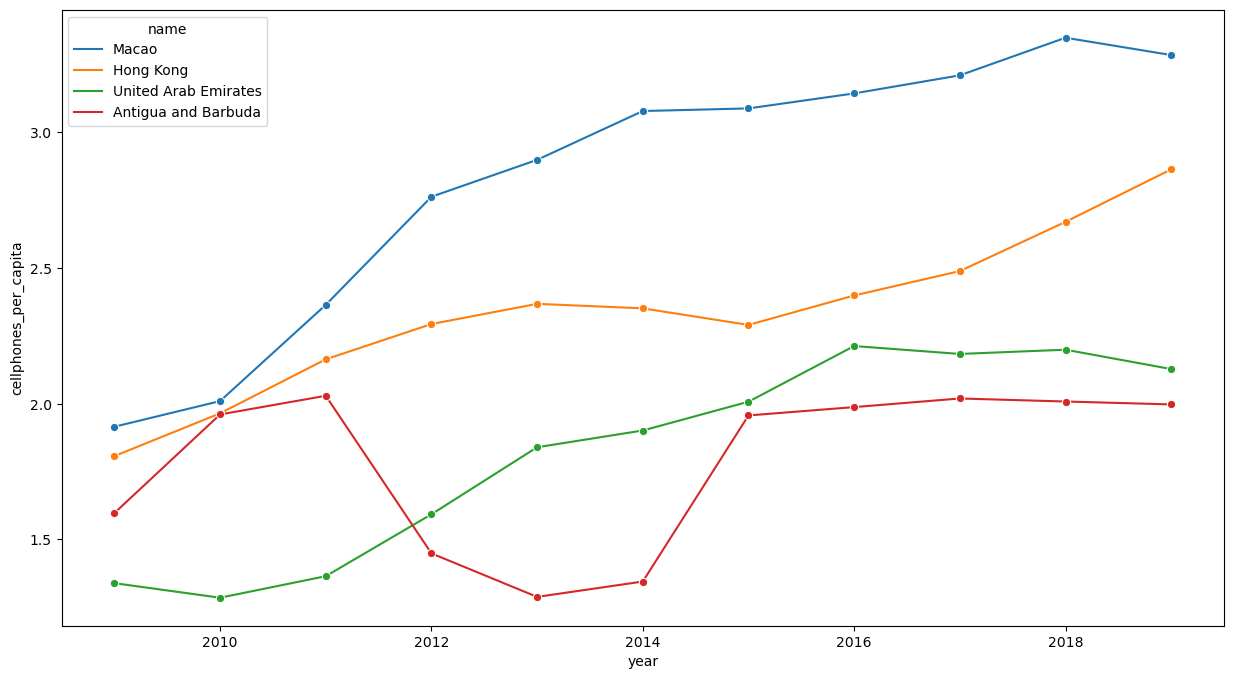

In [242]:
import seaborn as sns

plt.figure(figsize = (15, 8))

sns.lineplot(data = ppcd_growth_sub, x = 'year', y = 'cellphones_per_capita', hue='name', marker='o')

It looks like Hong Kong or Macao seem to have to the highest growth rate in the last 10 years, probably Macao by looking at the graphs. However in 2019 it appears that Hong Kong have the highest growth rate of cell phones per capita. 

# SQL

First we want to connect to the database and create a query to extract distinct usernames and put them into a pandas dataframe. 

In [244]:
import sqlite3
db_con = sqlite3.connect("user_actions.db") # connect to database

# Extract username from user_actions with action = "signup", distinct usernames
query = """
SELECT DISTINCT username
FROM user_actions
WHERE action = 'signup'
"""

# fetch result into panda dataframe
signup_users = pd.read_sql(query, db_con)
signup_users

,username
0,user34
1,user28
2,user1
3,user24
4,user15
5,user20
6,user18
7,user25
8,user3
9,user9


Then we want to find the total number of log entries for each user. 

In [246]:
query = """
SELECT user_id, username, COUNT(*) AS login_count
FROM user_actions
GROUP BY user_id, username;
"""
login_counts = pd.read_sql(query, db_con)
login_counts

,user_id,username,log_count
0,1,user1,104
1,2,user2,149
2,3,user3,108
3,4,user4,436
4,5,user5,192
5,6,user6,457
6,7,user7,362
7,8,user8,329
8,9,user9,118
9,10,user10,170


And finally we want to identify users who have both logged in (action = 'login') and signed up (action = 'signup') on the same day.

In [247]:
query = """
SELECT DISTINCT ua1.user_id, ua1.username
FROM user_actions ua1
JOIN user_actions ua2
    ON ua1.user_id = ua2.user_id
    AND DATE(ua1.timestamp) = DATE(ua2.timestamp)
WHERE ua1.action = 'signup' AND ua2.action = 'login';
"""
login_signup = pd.read_sql(query, db_con)
login_signup

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


# Regex 

We want to write a regular expression to extract all hashtags from a given comment. 

In [273]:
import re

# opening .txt file 
with open('comments.txt', 'r') as file:
    comments = file.readlines()

tag_list = re.findall("#\w+",  
                      comments[0]) # change 0 to 1,2,3,4,5 to extract from different comments.
print(tag_list)

['#programming', '#tips']


Now we want to: create a regular expression to find comments that mention both "#programming" and "#python". Apply the regex to comment 2 and check if it matches.

In [256]:
regex = "(?=.*#programming)(?=.*#python)"

contains_both = bool(re.search(regex, comments[2]))
print(contains_both)  

False


False is expected since comment 2 only includes #python. If we test on comment 5 we will get True since it containts both hashtags. 

In [258]:
regex = "(?=.*#programming)(?=.*#python)"

contains_both = bool(re.search(regex, comments[5]))
print(contains_both)

True


Tried the last exercise below but yeah. 

In [259]:
tag_list = []
for i in range(len(comments)):
    tag_list.append(re.findall("#\w+",  comments[i]))
tag_list

[['#programming', '#tips'],
 ['#coding', '#python'],
 ['#tech', '#data'],
 ['#programming', '#coding'],
 ['#data', '#analysis'],
 ['#programming', '#python', '#tips'],
 ['#tech', '#innovation'],
 ['#coding', '#python'],
 ['#data', '#analytics'],
 ['#programming', '#tips'],
 ['#coding', '#python'],
 ['#tech', '#data'],
 ['#programming', '#coding'],
 ['#data', '#insights'],
 ['#programming', '#python', '#tips'],
 ['#tech', '#research'],
 ['#coding', '#python'],
 ['#data', '#analytics'],
 ['#programming', '#tips'],
 ['#coding', '#innovation'],
 ['#programming', '#python', '#tips'],
 ['#tech', '#data'],
 ['#coding', '#python'],
 ['#data', '#analytics'],
 ['#programming', '#tips'],
 ['#coding', '#python'],
 ['#tech', '#innovation'],
 ['#programming', '#coding'],
 ['#data', '#analytics'],
 ['#programming', '#python', '#tips'],
 ['#coding', '#innovation'],
 ['#tech', '#data'],
 ['#programming', '#tips'],
 ['#coding', '#python'],
 ['#data', '#analysis'],
 ['#programming', '#tips'],
 ['#coding'